In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/My Drive/Colab Notebooks/Datasets/'

Mounted at /content/drive


In [3]:
df = pd.read_csv(path+'Copy of customer_transactions_sample.csv',encoding='latin1')
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12/01/2009 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,12/01/2009 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,12/01/2009 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,12/01/2009 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12/01/2009 07:45:00,1.25,13085.0,United Kingdom


In [4]:
df.info(),df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      525461 non-null  object 
 1   StockCode    525461 non-null  object 
 2   Description  522533 non-null  object 
 3   Quantity     525461 non-null  int64  
 4   InvoiceDate  525461 non-null  object 
 5   Price        525461 non-null  float64
 6   Customer ID  417534 non-null  float64
 7   Country      525461 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 32.1+ MB


(None, (525461, 8))

In [5]:
df.describe()

,Quantity,Price,Customer ID
count,525461.000000,525461.000000,417534.000000
mean,10.337667,4.688834,15360.645478
std,107.424110,146.126914,1680.811316
min,-9600.000000,-53594.360000,12346.000000
25%,1.000000,1.250000,13983.000000
50%,3.000000,2.100000,15311.000000
75%,10.000000,4.210000,16799.000000
max,19152.000000,25111.090000,18287.000000


## Data Preprocessing :

In [6]:
null_values = pd.DataFrame(data=df.isnull().sum()).T.rename(index={0: 'Null values'})
percent_null_values = pd.DataFrame(data=df.isnull().sum() / df.shape[0] * 100).T.rename(index={0: '% Null values'})
info = pd.concat([null_values, percent_null_values])

info

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
Null values,0.0,0.0,2928.000000,0.0,0.0,0.0,107927.000000,0.0
% Null values,0.0,0.0,0.557225,0.0,0.0,0.0,20.539488,0.0


- Since we dont have CustomerID for 20.5% of points we will remove them as we cannot give them any arbitrary ID.

In [7]:
df.dropna(axis=0, subset=['Customer ID'], inplace=True)

null_values = pd.DataFrame(df.isnull().sum()).T.rename(index={0: 'Null values'})
percent_null_values = pd.DataFrame(df.isnull().sum() / df.shape[0] * 100).T.rename(index={0: '% Null values'})
info = pd.concat([null_values, percent_null_values])

info

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
Null values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
% Null values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.shape

(410763, 8)

### EDA

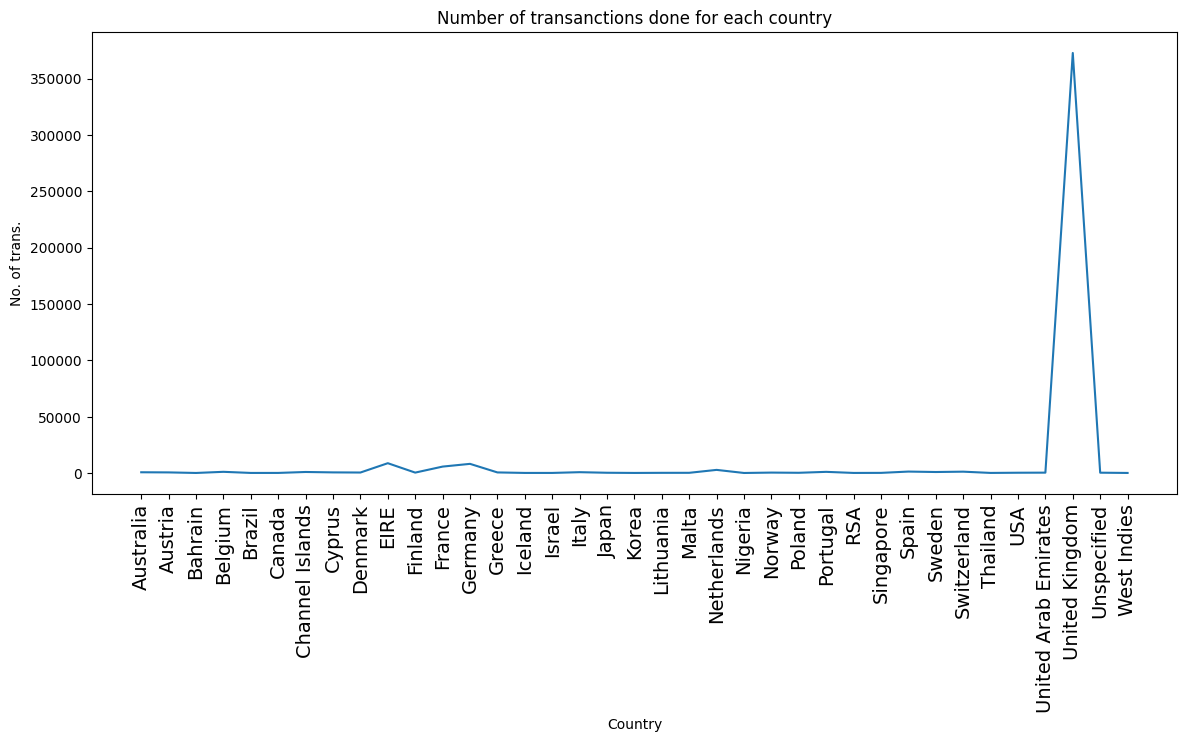

In [10]:
## Country wise transactions

plt.figure(figsize=(14,6))
plt.plot(df.groupby(['Country']).groups.keys(), df.groupby(['Country'])['Customer ID'].count())
plt.xticks(rotation = 90, fontsize = 14)
plt.title("Number of transanctions done for each country")
plt.ylabel("No. of trans.")
plt.xlabel("Country")
plt.show()

In [11]:
info = pd.DataFrame(data = df.groupby(['Country'])['Invoice'].nunique(), index=df.groupby(['Country']).groups.keys()).T
info

,Australia,Austria,Bahrain,Belgium,Brazil,Canada,Channel Islands,Cyprus,Denmark,EIRE,...,Singapore,Spain,Sweden,Switzerland,Thailand,USA,United Arab Emirates,United Kingdom,Unspecified,West Indies
Invoice,50,32,2,65,1,2,47,25,33,418,...,4,85,82,50,2,18,11,21481,11,1


- By looking at Dataframe we can say that
 - UK has done most of the transanctions. (21481)
 - Least transactions done by countries like canada,Brazil etc

In [12]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12/01/2009 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,12/01/2009 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,12/01/2009 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,12/01/2009 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12/01/2009 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,12/09/2010 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,12/09/2010 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,12/09/2010 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,12/09/2010 20:01:00,3.75,17530.0,United Kingdom


In [13]:
## Different unique products
print(df['StockCode'].nunique())

4031


In [14]:
### Unique transactions

print(df['Invoice'].nunique())

23587


In [15]:
### Unique customers based on customer id

print(df['Customer ID'].nunique())

4383


In [16]:
uniques = pd.DataFrame({
    'Customers': df['Customer ID'].nunique(),
    'Transactions': df['Invoice'].nunique(),
    'Products' : df['StockCode'].nunique()
},index = ['Count(Quantity)'])

In [17]:
uniques

,Customers,Transactions,Products
Count(Quantity),4383,23587,4031


- 4383 distinct customers indicate a significant customer base.
- Each customer earns an average of about 5.
- There were 38 transactions and 4383 customer interactions.
- A diverse array of consumer products is available, resulting in 4031 options. There are roughly 5 products per product. The mean amount of transactions is 85 out of 4031 products, which equates to 23587 transactions.
- Repeat business: The average score was 5. There are 38 transactions per customer, which is a reasonable level of repeat business.

### Checking the number of items bought in a single transanctions :

In [18]:
df1 = df.groupby(['Customer ID', 'Invoice'], as_index=False)['InvoiceDate'].count()

# Rename the 'InvoiceDate' column to 'Number of products'
df1 = df1.rename(columns={'InvoiceDate': 'Number of products'})
df1 = df1.sort_values('Customer ID')

df1.head(10)

,Customer ID,Invoice,Number of products
0,12346.0,491725,1
14,12346.0,C525274,1
13,12346.0,C525099,1
12,12346.0,C514024,9
11,12346.0,C495800,1
9,12346.0,499763,5
8,12346.0,495295,1
10,12346.0,513774,19
6,12346.0,493412,1
5,12346.0,493410,1


- The CustomerID is 12346. The customer has issued 10 separate invoices.
- Invoices can be as low as 10 products or as high as 20 products.
- The invoice for a particular item or in bulk purchase is indicative of different purchasing patterns.
- Refunds or cancellations: Invoice numbers that begin with 'C' (e.) g. Some transactions may involve cancellations or returns, as indicated by the code C495800 and C5227.

In [19]:
# Total cancelled Transactions

df1['Cancelled orders'] = df1['Invoice'].str.startswith('C',na=False).astype(int)
total_cancelled = df1['Cancelled orders'].sum()
total_cancelled

4372

In [20]:
df1.head()

,Customer ID,Invoice,Number of products,Cancelled orders
0,12346.0,491725,1,0
14,12346.0,C525274,1,1
13,12346.0,C525099,1,1
12,12346.0,C514024,9,1
11,12346.0,C495800,1,1


In [21]:
cancelled_orders_proportion = total_cancelled/ len(df1)

print("Number of orders cancelled {}/{} ({:.2f}%)".format(total_cancelled, len(df1), cancelled_orders_proportion * 100))


Number of orders cancelled 4372/23587 (18.54%)


In [22]:
df.sort_values('Customer ID').head(10)


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
253045,513774,20685,DOORMAT RED SPOT,1,06/28/2010 13:53:00,7.49,12346.0,United Kingdom
45228,493410,TEST001,This is a test product.,5,01/04/2010 09:24:00,4.50,12346.0,United Kingdom
253042,513774,48188,DOORMAT WELCOME PUPPIES,1,06/28/2010 13:53:00,7.49,12346.0,United Kingdom
253043,513774,48187,DOORMAT NEW ENGLAND,1,06/28/2010 13:53:00,7.49,12346.0,United Kingdom
253044,513774,22366,DOORMAT AIRMAIL,1,06/28/2010 13:53:00,7.49,12346.0,United Kingdom
253046,513774,21955,DOORMAT UNION JACK GUNS AND ROSES,1,06/28/2010 13:53:00,7.49,12346.0,United Kingdom
66084,495295,TEST001,This is a test product.,5,01/22/2010 13:30:00,4.50,12346.0,United Kingdom
39398,492718,TEST001,This is a test product.,5,12/18/2009 10:47:00,4.50,12346.0,United Kingdom
45230,493412,TEST001,This is a test product.,5,01/04/2010 09:53:00,4.50,12346.0,United Kingdom
39411,492722,TEST002,This is a test product.,1,12/18/2009 10:55:00,1.00,12346.0,United Kingdom


- See the Customer ID number 12346. The 'C' on invoices indicates that the customer has cancelled multiple orders.
- Negative quantities or the stock code 'D' are commonly used to represent adjustments, discounts, or test products in these transactions.
- Transactions may require the use of test products ('TEST001' and 'TC002'). It is possible that these samples or trials are not indicative of typical purchasing behavior.
- Despite the cancellation of orders and testing products, customers still purchase regular items like parasols and umbrellas.

In [23]:
## Check for discounted products

df1 = df[df['Description'] == 'Discount']
df1.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
735,C489535,D,Discount,-1,12/01/2009 12:11:00,9.00,15299.0,United Kingdom
736,C489535,D,Discount,-1,12/01/2009 12:11:00,19.00,15299.0,United Kingdom
24675,C491428,D,Discount,-1,12/10/2009 20:23:00,9.10,15494.0,United Kingdom
29958,C491962,D,Discount,-1,12/14/2009 16:38:00,0.59,13206.0,United Kingdom
39127,C492693,D,Discount,-1,12/17/2009 18:47:00,6.85,13408.0,United Kingdom


- So there are some discounted transanctions too but they appear to be cancelled.

In [24]:
# Filter the DataFrame for negative quantity orders excluding discounts
negative_quantity_orders = df[(df['Quantity'] < 0) & (df['Description'] != 'Discount')]

for index, order in negative_quantity_orders.iterrows():
    counterpart_order = df[(df['Customer ID'] == order['Customer ID']) &
                            (df['StockCode'] == order['StockCode']) &
                            (df['Description'] == order['Description']) &
                            (df['Quantity'] > 0) &
                            (df['Price'] == order['Price'])]
    if counterpart_order.empty:
        print("No counterpart found for negative quantity order:", order)
    else:
        print("Counterpart found for negative quantity order:", order)

Streaming output truncated to the last 5000 lines.
InvoiceDate              11/24/2010 13:10:00
Price                                   0.21
Customer ID                          16634.0
Country                       United Kingdom
Name: 486093, dtype: object
Counterpart found for negative quantity order: Invoice                                C534838
StockCode                                84568
Description    GIRLS ALPHABET IRON ON PATCHES 
Quantity                                  -288
InvoiceDate                11/24/2010 13:10:00
Price                                     0.21
Customer ID                            16634.0
Country                         United Kingdom
Name: 486094, dtype: object
No counterpart found for negative quantity order: Invoice                         C534845
StockCode                         20750
Description    RED RETROSPOT MINI CASES
Quantity                             -8
InvoiceDate         11/24/2010 13:25:00
Price                              6.35


### Removing cancelled orders

In [25]:
# Create a boolean mask for rows with negative Quantity and not 'Discount'

doubtful_entries = []
entries_to_remove = []
mask = (df['Quantity'] < 0) & (df['Description'] != 'Discount')

# Filter the DataFrame
df_filtered = df[mask]

# Create a new column 'QuantityCancelled' and initialize with 0
df_cleaned = df.copy()
df_cleaned['QuantityCancelled'] = 0

# Group the data by 'Customer ID', 'StockCode', and 'InvoiceDate'
grouped = df_filtered.groupby(['Customer ID', 'StockCode', 'InvoiceDate'])

# For each group, find the counterparts with positive Quantity and update QuantityCancelled
for group_keys, group in grouped:
    customer_id, stock_code, invoice_date = group_keys
    counterparts = df[(df['Customer ID'] == customer_id) &
                      (df['StockCode'] == stock_code) &
                      (df['InvoiceDate'] < invoice_date) &
                      (df['Quantity'] > 0)]

    if counterparts.empty:
        # No counterpart, mark as doubtful entries
        doubtful_entries.extend(group.index)
    else:
        # Update QuantityCancelled for counterparts
        counterparts_sorted = counterparts.sort_values('Quantity', ascending=False)
        quantity_to_cancel = -group['Quantity'].sum()
        cancelled_quantity = 0

        for idx, row in counterparts_sorted.iterrows():
            remaining_quantity = row['Quantity'] - (quantity_to_cancel - cancelled_quantity)
            if remaining_quantity >= 0:
                df_cleaned.at[idx, 'QuantityCancelled'] = quantity_to_cancel - cancelled_quantity
                cancelled_quantity = quantity_to_cancel
                break
            else:
                df_cleaned.at[idx, 'QuantityCancelled'] = row['Quantity']
                cancelled_quantity += row['Quantity']

        # Mark cancelled orders for removal
        entries_to_remove.extend(group.index)

In [26]:

print("Entry to remove {}".format(len(entries_to_remove)))
print("Doubtfull Entry {}".format(len(doubtful_entries)))

Entry to remove 7902
Doubtfull Entry 1822


In [27]:
df_cleaned.drop(entries_to_remove, axis=0, inplace=True)
df_cleaned.drop(doubtful_entries, axis=0, inplace=True)

### StockCode feature especially the discounted items

In [28]:
list_special_codes = df_cleaned[df_cleaned['StockCode'].str.contains('^[a-zA-Z]+', regex = True)]['StockCode'].unique()
list_special_codes

array(['POST', 'D', 'C2', 'M', 'BANK CHARGES', 'TEST001', 'TEST002',
       'PADS', 'ADJUST', 'ADJUST2', 'SP1002'], dtype=object)

In [29]:
for code in list_special_codes:
    print("{:<17} -> {:<35}".format(code, df_cleaned[df_cleaned['StockCode'] == code]['Description'].values[0]))

POST              -> POSTAGE                            
D                 -> Discount                           
C2                -> CARRIAGE                           
M                 -> Manual                             
BANK CHARGES      ->  Bank Charges                      
TEST001           -> This is a test product.            
TEST002           -> This is a test product.            
PADS              -> PADS TO MATCH ALL CUSHIONS         
ADJUST            -> Adjustment by john on 26/01/2010 16
ADJUST2           -> Adjustment by Peter on Jun 25 2010 
SP1002            -> KID'S CHALKBOARD/EASEL             


In [30]:
df_cleaned['QuantityCancelled'] = np.nan_to_num(df_cleaned['QuantityCancelled'])
df_cleaned.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,QuantityCancelled
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12/01/2009 07:45:00,6.95,13085.0,United Kingdom,0
1,489434,79323P,PINK CHERRY LIGHTS,12,12/01/2009 07:45:00,6.75,13085.0,United Kingdom,0
2,489434,79323W,WHITE CHERRY LIGHTS,12,12/01/2009 07:45:00,6.75,13085.0,United Kingdom,0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,12/01/2009 07:45:00,2.10,13085.0,United Kingdom,0
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12/01/2009 07:45:00,1.25,13085.0,United Kingdom,0


- Each row represents a unique customer order, including details like invoice number, product description, quantity, and customer information.
- The QuantityCancelled column indicates cancellation status; in the displayed data, all entries show no cancellations.
- Diverse product range includes items like Christmas glass balls, cherry lights, record frames, and ceramic trinket boxes.
- Orders primarily originate from the United Kingdom, showcasing a focus on the local market.
- -user probably purchased many different items and each have been given a row as shown. We will need to merge these so we will add the totalprice feature for each row.


In [31]:
df_cleaned['QuantityCancelled'] = np.nan_to_num(df_cleaned['QuantityCancelled'])
df_cleaned.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,QuantityCancelled
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12/01/2009 07:45:00,6.95,13085.0,United Kingdom,0
1,489434,79323P,PINK CHERRY LIGHTS,12,12/01/2009 07:45:00,6.75,13085.0,United Kingdom,0
2,489434,79323W,WHITE CHERRY LIGHTS,12,12/01/2009 07:45:00,6.75,13085.0,United Kingdom,0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,12/01/2009 07:45:00,2.10,13085.0,United Kingdom,0
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12/01/2009 07:45:00,1.25,13085.0,United Kingdom,0


In [32]:
df_cleaned['TotalPrice'] = df_cleaned['Price'] * (df_cleaned['Quantity'] - df_cleaned['QuantityCancelled'])
df_cleaned.sort_values('Customer ID')

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,QuantityCancelled,TotalPrice
56117,494450,TEST001,This is a test product.,5,01/14/2010 13:50:00,4.50,12346.0,United Kingdom,0,22.50
253044,513774,22366,DOORMAT AIRMAIL,1,06/28/2010 13:53:00,7.49,12346.0,United Kingdom,0,7.49
253043,513774,48187,DOORMAT NEW ENGLAND,1,06/28/2010 13:53:00,7.49,12346.0,United Kingdom,0,7.49
253042,513774,48188,DOORMAT WELCOME PUPPIES,1,06/28/2010 13:53:00,7.49,12346.0,United Kingdom,0,7.49
253041,513774,22688,DOORMAT PEACE ON EARTH BLUE,1,06/28/2010 13:53:00,7.49,12346.0,United Kingdom,0,7.49
...,...,...,...,...,...,...,...,...,...,...
199813,508581,20768,GREEN FERN JOURNAL,6,05/17/2010 11:55:00,2.55,18287.0,United Kingdom,0,15.30
199812,508581,20769,DAISY JOURNAL,6,05/17/2010 11:55:00,2.55,18287.0,United Kingdom,0,15.30
199811,508581,22610,PENS ASSORTED FUNNY FACE,36,05/17/2010 11:55:00,0.85,18287.0,United Kingdom,0,30.60
199825,508581,22284,HEN HOUSE DECORATION,12,05/17/2010 11:55:00,1.65,18287.0,United Kingdom,0,19.80


### Now we sum the individual orders and group them on the basis of invoice number to remove the problem of duplicate rows for same order :

In [33]:
# Group by 'Customer ID' and 'Invoice' to calculate total basket price
temp = df_cleaned.groupby(by=['Customer ID', 'Invoice'], as_index=False)['TotalPrice'].sum()
basket_price = temp.rename(columns={'TotalPrice': 'Basket Price'})

df_cleaned['InvoiceDate_int'] = pd.to_datetime(df_cleaned['InvoiceDate']).astype('int64')

temp = df_cleaned.groupby(by=['Customer ID', 'Invoice'], as_index=False)['InvoiceDate_int'].mean()

df_cleaned.drop('InvoiceDate_int', axis=1, inplace=True)
basket_price['InvoiceDate'] = pd.to_datetime(temp['InvoiceDate_int'])
basket_price = basket_price[basket_price['Basket Price'] > 0]
basket_price.sort_values('Customer ID')


,Customer ID,Invoice,Basket Price,InvoiceDate
0,12346.0,491725,45.00,2009-12-14 08:34:00
1,12346.0,491742,22.50,2009-12-14 11:00:00
2,12346.0,491744,22.50,2009-12-14 11:02:00
3,12346.0,492718,22.50,2009-12-18 10:47:00
4,12346.0,492722,1.00,2009-12-18 10:55:00
...,...,...,...,...
19291,18286.0,492250,462.95,2009-12-16 10:45:00
19294,18287.0,523289,862.00,2010-09-21 12:17:00
19295,18287.0,523290,30.60,2010-09-21 12:19:00
19293,18287.0,508581,1071.61,2010-05-17 11:55:00


#### Plotting the purchases made


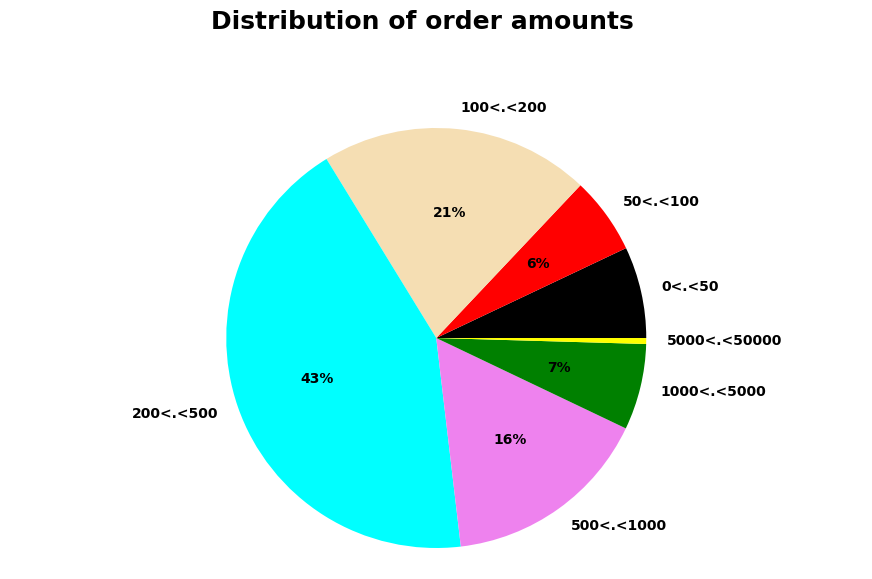

In [34]:
price_range = [0, 50, 100, 200, 500, 1000, 5000, 50000]
count_price = []
for i,price in enumerate(price_range):
    if i==0:continue
    val = basket_price[(basket_price['Basket Price'] < price)&
                       (basket_price['Basket Price'] > price_range[i-1])]['Basket Price'].count()
    count_price.append(val)

plt.rc('font', weight='bold')
f, ax = plt.subplots(figsize=(11, 6))
colors = ['black', 'red', 'wheat', 'cyan', 'violet', 'green', 'yellow']
labels = ["{}<.<{}".format(price_range[i-1], s) for i,s in enumerate(price_range) if i != 0]
sizes = count_price
explode = [0.0 if sizes[i] < 100 else 0.0 for i in range(len(sizes))]
ax.pie(sizes, explode = explode, labels = labels, colors = colors,
       autopct = lambda x:'{:1.0f}%'.format(x) if x > 1 else '',
       shadow = False, startangle = 0)
ax.axis('equal')
f.text(0.5, 1.01, "Distribution of order amounts", ha = 'center', fontsize = 18)
plt.show()

In [35]:
from collections import defaultdict, Counter
import spacy

def keywords_inventory(dataframe, column='Description'):
    # Load spaCy's English model
    nlp = spacy.load('en_core_web_sm')
    count_keywords = Counter()
    keywords_roots = defaultdict(set)

    # Process each description in the specified column
    for doc in nlp.pipe(dataframe[column].dropna().astype(str)):
        for token in doc:
            if token.pos_ in ['NOUN', 'PROPN']:
                lemma = token.lemma_.lower()
                count_keywords[lemma] += 1
                keywords_roots[lemma].add(token.text.lower())

    # Select the shortest word form for each lemma
    keywords_select = {lemma: min(words, key=len) for lemma, words in keywords_roots.items()}
    category_keys = list(keywords_select.values())

    # Print the number of unique keywords
    print(f"Number of keywords in the column '{column}': {len(category_keys)}")
    return category_keys, keywords_roots, keywords_select, count_keywords

df_produits = pd.DataFrame(df['Description'].unique()).rename(columns = {0:"Description"})
keywords, keywords_roots, keywords_select, count_keywords = keywords_inventory(df_produits)

print("Keywords:", keywords)
print("Keywords Roots:", keywords_roots)
print("Keywords Select:", keywords_select)
print("Count Keywords:", count_keywords)

Number of keywords in the column 'Description': 1944
Keywords: ['christmas', 'glass', 'ball', 'lights', 'pink', 'cherry', 'white', 'record', 'frame', 'size', 'strawberry', 'ceramic', 'trinket', 'box', 'doughnut', 'pot', 'save', 'planet', 'mug', 'font', 'home', 'sweet', 'doormat', 'cat', 'bowl', 'dog', 'chasing', 'design', 'heart', 'spoons', 'large', 'lunchbox', 'cutlery', 'fairy', 'cakes', 'door', 'mat', 'black', 'flock', 'love', 'building', 'block', 'word', 'assorted', 'colour', 'bird', 'ornament', 'peace', 'wooden', 'letter', 'craft', 'ivory', 'trellis', 'dove', 'english', 'breakfast', 'plate', 'pizza', 'diner', 'wall', 'clock', 'set', 'flying', 'ducks', 'area', 'metal', 'sign', 'person', 'bath', 'classic', 'small', 'marshmallows', 'biscuit', 'light', 'blue', 'scottie', 'hot', 'water', 'bottle', 'decoration', 'stocking', 'party', 'wood', 'joy', 'cinammon', 'orange', 'wreath', 'eucalyptus', 'pinecone', 'advent', 'monster', 'coffee', 'mugs', 'political', 'globe', 'stripes', 'monkey', '

### Plotting keywords vs frequency graph :

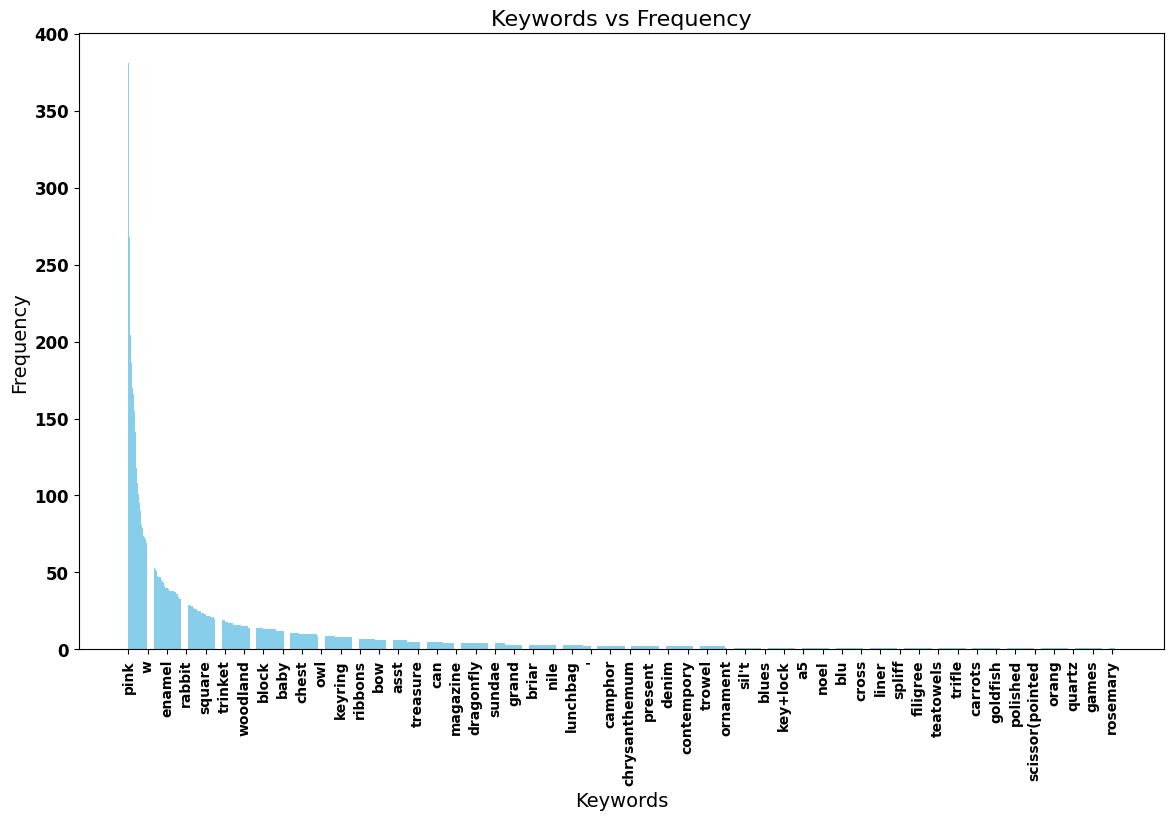

In [36]:
def plot_keywords(count_keywords):
    sorted_keywords = count_keywords.most_common()
    keywords, frequencies = zip(*sorted_keywords)

    # Determine the number of labels to display
    num_labels = len(keywords)
    step = max(1, num_labels // 50)  # Show every nth label, depending on total number

    # Create the plot
    plt.figure(figsize=(14, 8))
    bars = plt.bar(keywords, frequencies, color='skyblue')

    # Set labels and title
    plt.xlabel('Keywords', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.title('Keywords vs Frequency', fontsize=16)

    # Set x-ticks to show every nth label for clarity
    plt.xticks(np.arange(0, num_labels, step), labels=keywords[::step], rotation=90, fontsize=10)
    plt.yticks(fontsize=12)

    plt.show()

plot_keywords(count_keywords)

In [37]:
### Store important words

words =[
    [word, count]
    for word, count in count_keywords.items()
    if word not in ['pink', 'blue', 'tag', 'green', 'orange']
    and len(word) >= 3
    and count >= 13
]

words.sort(key=lambda x:x[1],reverse=True)
print(len(words))

282


### Descrining every product in terms of words present in the description

- presence of a word in the description is indicated by a 1, otherwise 0

In [38]:
threshold = [0, 1, 2, 3, 5, 10]
unique_descriptions = df_cleaned['Description'].unique()

product_word_matrix = pd.DataFrame(index=unique_descriptions)

# Add columns for each word in words
for word, count in words:
    product_word_matrix[word] = [int(word.upper() in desc) for desc in unique_descriptions]

# Add columns for price ranges
price_range_cols = []
for i in range(len(threshold)):
    if i == len(threshold) - 1:
        col_name = f'>{threshold[i]}'
    else:
        col_name = f'{threshold[i]}<.<{threshold[i+1]}'
    price_range_cols.append(col_name)
    product_word_matrix[col_name] = 0

# Populate price range columns based on product prices
for desc in unique_descriptions:
    product_price = df_cleaned[df_cleaned['Description'] == desc]['Price'].mean()
    for i, price_range in enumerate(threshold):
        if product_price <= price_range:
            product_word_matrix.at[desc, price_range_cols[i]] = 1
            break


print("{:<10} {:<20}".format('range', 'number of products'))
print(20 * '-')
for price_range in price_range_cols:
    num_products = product_word_matrix[price_range].sum()
    print("{:<10} {:<20}".format(price_range, num_products))

range      number of products  
--------------------
0<.<1      0                   
1<.<2      928                 
2<.<3      1163                
3<.<5      847                 
5<.<10     708                 
>10        584                 


# Clustering

In [39]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [40]:
product_word_matrix

,red,set,glass,heart,flower,white,bag,vintage,rose,candle,...,spring,kashmiri,circus,parade,0<.<1,1<.<2,2<.<3,3<.<5,5<.<10,>10
15CM CHRISTMAS GLASS BALL 20 LIGHTS,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
PINK CHERRY LIGHTS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
WHITE CHERRY LIGHTS,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
"RECORD FRAME 7"" SINGLE SIZE",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
STRAWBERRY CERAMIC TRINKET BOX,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BAKING MOULD CHOCOLATE CUPCAKES,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
BAKING MOULD ROSE WHITE CHOCOLATE,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
BAKING MOULD ROSE MILK CHOCOLATE,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
BAKING MOULD CHOCOLATE CUP CAKES,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [41]:
# use optimal clusters
from sklearn.cluster import KMeans,AgglomerativeClustering
for nclusters in range(3,10):
  km = KMeans(init='k-means++',n_clusters = nclusters,n_init = 30)
  km.fit(product_word_matrix)
  clusters = km.predict(product_word_matrix)
  sil_avg = silhouette_score(product_word_matrix,clusters)
  print("For n_clusters : ", nclusters, "The average silhouette_score is : ", sil_avg)

For n_clusters :  3 The average silhouette_score is :  0.08102586153854444
For n_clusters :  4 The average silhouette_score is :  0.08383264555707637
For n_clusters :  5 The average silhouette_score is :  0.11071892968190129
For n_clusters :  6 The average silhouette_score is :  0.1094615054403389
For n_clusters :  7 The average silhouette_score is :  0.11254470529475327
For n_clusters :  8 The average silhouette_score is :  0.0753790345665408
For n_clusters :  9 The average silhouette_score is :  0.10639117285768246


In [42]:
## Improve silhouette average

nclusters = 5
sil_avg = -1

while sil_avg < 0.112:
    kmeans = KMeans(init = 'k-means++', n_clusters = nclusters, n_init = 30)
    kmeans.fit(product_word_matrix)
    clusters = kmeans.predict(product_word_matrix)
    sil_avg = silhouette_score(product_word_matrix, clusters)
    print("For n_clusters : ", nclusters, "The average silhouette_score is : ", sil_avg)

For n_clusters :  5 The average silhouette_score is :  0.10591316455675087
For n_clusters :  5 The average silhouette_score is :  0.09599656408855267
For n_clusters :  5 The average silhouette_score is :  0.11255194338693893


In [43]:
pd.Series(clusters).value_counts()

4    1372
3     928
1     847
2     708
0     589
Name: count, dtype: int64

### Analyzing the 5 clusters

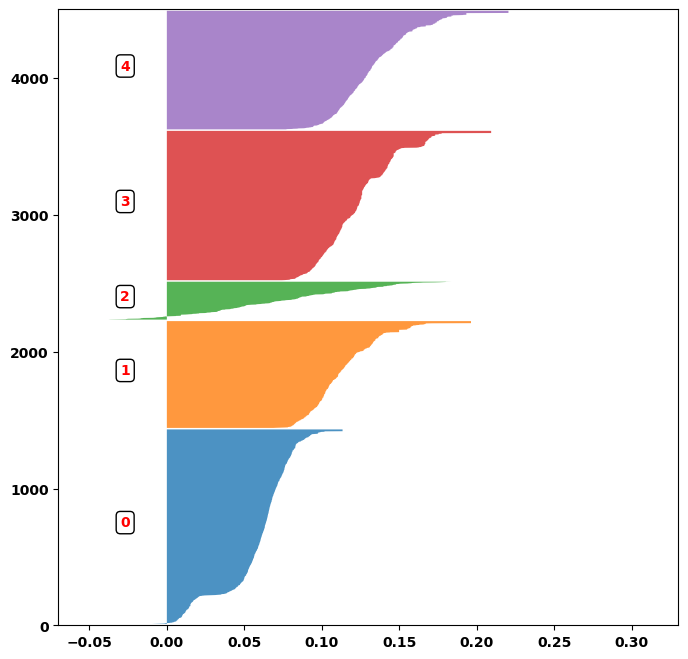

In [44]:
from sklearn.metrics import silhouette_samples

nclusters = 5
lim_x = [-0.07, 0.33]
mat_size = len(product_word_matrix)

kmeans = KMeans(init='k-means++', n_clusters=nclusters, n_init=30)
kmeans.fit(product_word_matrix)
clusters = kmeans.predict(product_word_matrix)

sample_silhouette_values = silhouette_samples(product_word_matrix, clusters)

plt.figure(figsize=(8, 8))
plt.xlim(lim_x[0], lim_x[1])
plt.ylim(0, mat_size + (nclusters + 1) * 10)
y_lower = 10

for i in range(nclusters):
    ith_cluster_silhouette_values = sample_silhouette_values[clusters == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, alpha=0.8)

    plt.text(-0.03, y_lower + 0.5 * size_cluster_i, str(i),
             color='red', fontweight='bold',
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

    y_lower = y_upper + 10

plt.show()


Checking which words are most common in the clusters.

In [45]:
liste = pd.DataFrame(unique_descriptions)

# Extract list of words from list_products
liste_words = [word for (word, occurrence) in words]


occurrence = [dict() for _ in range(nclusters)]

for i in range(nclusters):
    cluster_list = liste.loc[clusters == i]
    for word in liste_words:
        if word in ['art', 'set', 'heart', 'pink', 'blue', 'tag']:
            continue
        occurrence[i][word] = sum(cluster_list.loc[:, 0].str.contains(word.upper()))

In [46]:
def random_color_func(word=None, font_size=None, position=None, orientation=None, font_path=None, random_state=None):
    h = int(360.0 * tone / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(70, 120)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)


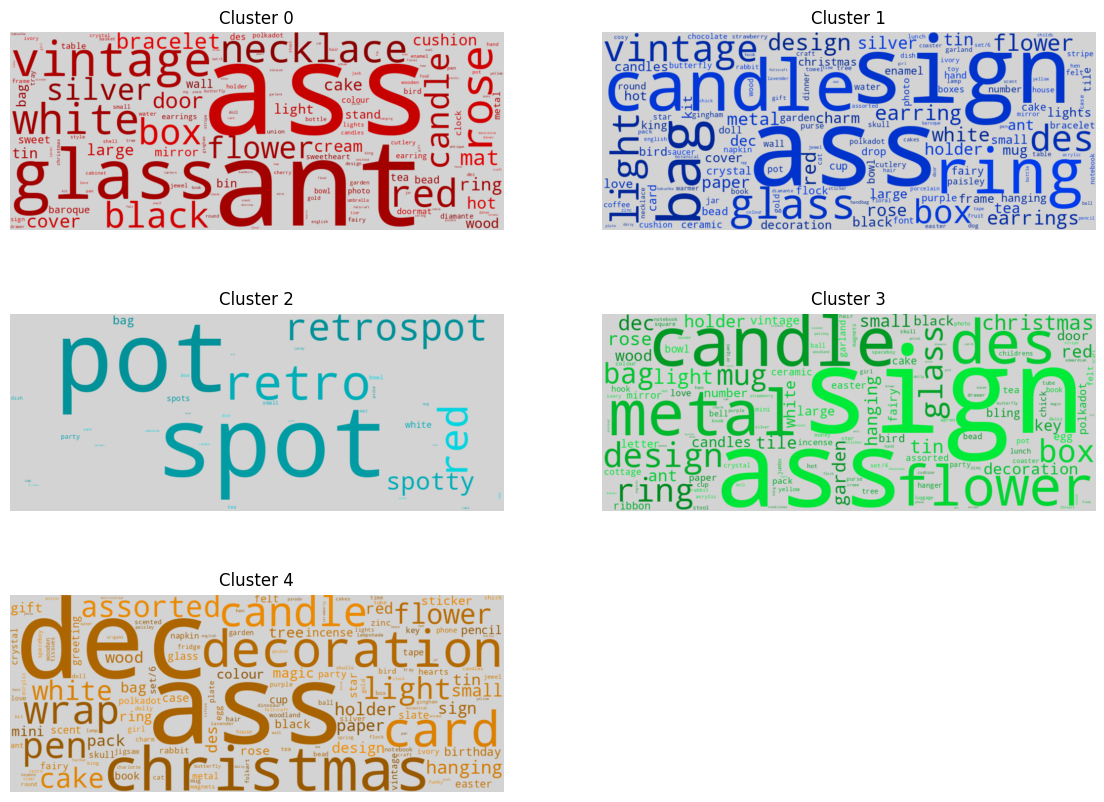

In [47]:
from wordcloud import WordCloud

def make_wordcloud(word_list, increment):
    ax = fig.add_subplot(4, 2, increment)
    words = dict()
    trunc_occurrences = word_list[0:150]
    for s in trunc_occurrences:
        words[s[0]] = s[1]

    wc = WordCloud(width=1000, height=400, background_color='lightgrey', max_words=1628, relative_scaling=1,
                   color_func=random_color_func, normalize_plurals=False)
    wc.generate_from_frequencies(words)
    ax.imshow(wc, interpolation="bilinear")
    ax.axis('off')
    plt.title('Cluster {}'.format(increment-1))

fig = plt.figure(1, figsize=(14, 14))
color = [0, 160, 130, 95, 280, 40, 330, 110, 25]
for i in range(nclusters):
    list_cluster_occurrences = occurrence[i]
    tone = color[i]
    word_list = []
    for key, value in list_cluster_occurrences.items():
        word_list.append([key, value])
    word_list.sort(key=lambda x: x[1], reverse=True)
    make_wordcloud(word_list, i+1)

plt.show()

### PCA For Dimensionality Reduction

In [48]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(product_word_matrix)
pca_samples = pca.transform(product_word_matrix)

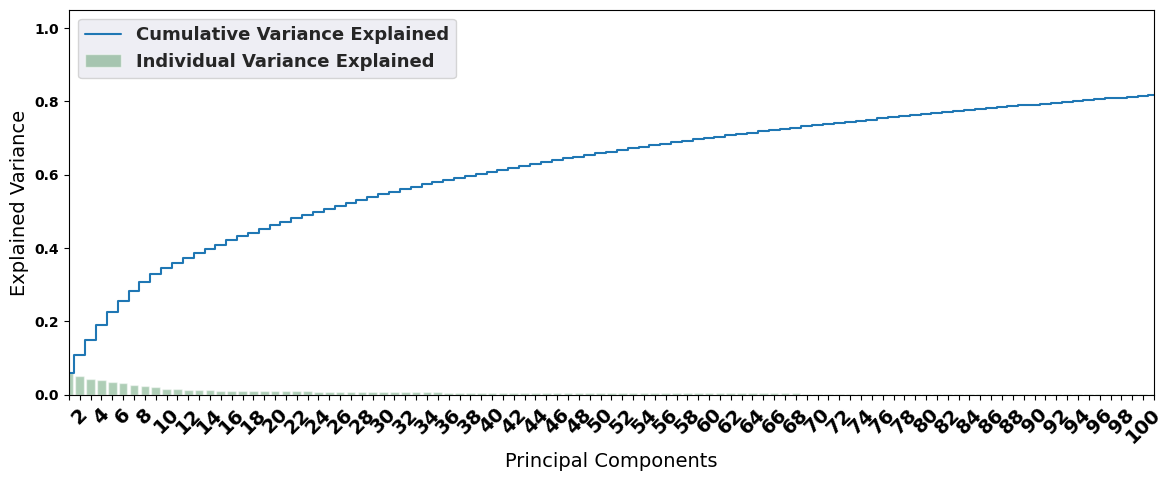

In [49]:
fig, ax = plt.subplots(figsize=(14, 5))
sns.set(font_scale=1)

# Plotting cumulative variance explained
plt.step(range(product_word_matrix.shape[1]), pca.explained_variance_ratio_.cumsum(), where='mid', label='Cumulative Variance Explained')

# Plotting individual variance explained
sns.barplot(x=np.arange(1, product_word_matrix.shape[1] + 1), y=pca.explained_variance_ratio_, alpha=0.5, color='g', label='Individual Variance Explained')

plt.xlim(0, 100)
plt.xticks(rotation=45, fontsize=14)
ax.set_xticklabels([s if int(s.get_text()) % 2 == 0 else '' for s in ax.get_xticklabels()])

plt.ylabel("Explained Variance", fontsize=14)
plt.xlabel("Principal Components", fontsize=14)
plt.legend(loc='upper left', fontsize=13)
plt.show()

### Generating Customer Segments/Categories :
We will use the already generated product categories and create a new feature which tells to which category the product belongs to.

In [50]:
corresp = dict()
for key, val in zip(unique_descriptions, clusters):
    corresp[key] = val

df_cleaned['categ_product'] = df_cleaned.loc[:, 'Description'].map(corresp)
df_cleaned[['Invoice', 'Description', 'categ_product']][:10]

,Invoice,Description,categ_product
0,489434,15CM CHRISTMAS GLASS BALL 20 LIGHTS,0
1,489434,PINK CHERRY LIGHTS,0
2,489434,WHITE CHERRY LIGHTS,0
3,489434,"RECORD FRAME 7"" SINGLE SIZE",1
4,489434,STRAWBERRY CERAMIC TRINKET BOX,3
5,489434,PINK DOUGHNUT TRINKET POT,3
6,489434,SAVE THE PLANET MUG,3
7,489434,FANCY FONT HOME SWEET HOME DOORMAT,0
8,489435,CAT BOWL,1
9,489435,"DOG BOWL , CHASING BALL DESIGN",0


In [51]:
df_cleaned['categ_product'].unique()

array([0, 1, 3, 4, 2], dtype=int32)

In [52]:
# Creating 5 new features that will contain the amount in a single transanction on different categories of product.
for i in range(5):
    col = 'categ_{}'.format(i)
    df_temp = df_cleaned[df_cleaned['categ_product'] == i]
    price_temp = df_temp['Price'] * (df_temp['Quantity'] - df_temp['QuantityCancelled'])
    price_temp = price_temp.apply(lambda x:x if x > 0 else 0)
    df_cleaned.loc[:, col] = price_temp
    df_cleaned[col].fillna(0, inplace = True)

df_cleaned[['Invoice', 'Description', 'categ_product', 'categ_0', 'categ_1', 'categ_2', 'categ_3', 'categ_4']]

,Invoice,Description,categ_product,categ_0,categ_1,categ_2,categ_3,categ_4
0,489434,15CM CHRISTMAS GLASS BALL 20 LIGHTS,0,83.40,0.0,0.0,0.0,0.0
1,489434,PINK CHERRY LIGHTS,0,81.00,0.0,0.0,0.0,0.0
2,489434,WHITE CHERRY LIGHTS,0,81.00,0.0,0.0,0.0,0.0
3,489434,"RECORD FRAME 7"" SINGLE SIZE",1,0.00,100.8,0.0,0.0,0.0
4,489434,STRAWBERRY CERAMIC TRINKET BOX,3,0.00,0.0,0.0,30.0,0.0
...,...,...,...,...,...,...,...,...
525456,538171,FELTCRAFT DOLL ROSIE,1,0.00,5.9,0.0,0.0,0.0
525457,538171,FELTCRAFT PRINCESS LOLA DOLL,0,3.75,0.0,0.0,0.0,0.0
525458,538171,FELTCRAFT PRINCESS OLIVIA DOLL,0,3.75,0.0,0.0,0.0,0.0
525459,538171,PINK FLORAL FELTCRAFT SHOULDER BAG,0,7.50,0.0,0.0,0.0,0.0


In [53]:
df_cleaned['Amount'] = df_cleaned['Quantity'] * df_cleaned['Price']

basket_price = df_cleaned[['Customer ID', 'Invoice']].drop_duplicates().copy()

# Aggregating the amounts spent per category per order
for i in range(nclusters):
    col = 'categ_{}'.format(i)
    temp = df_cleaned.groupby(['Customer ID', 'Invoice'])[col].sum().reset_index()
    basket_price = basket_price.merge(temp, on=['Customer ID', 'Invoice'], how='left')

# Fill NaN values with 0
basket_price.fillna(0, inplace=True)

# Adding the total amount spent per order
basket_price['TotalAmount'] = df_cleaned.groupby('Invoice')['Amount'].sum().values

# Display the resulting DataFrame
basket_price

,Customer ID,Invoice,categ_0,categ_1,categ_2,categ_3,categ_4,TotalAmount
0,13085.0,489434,304.90,100.80,0.00,99.60,0.00,505.30
1,13085.0,489435,45.00,61.20,0.00,39.60,0.00,145.80
2,13078.0,489436,411.61,68.10,0.00,104.04,0.00,630.33
3,15362.0,489437,138.55,93.60,0.00,30.00,48.60,310.75
4,18102.0,489438,1550.80,595.50,0.00,139.94,0.00,2286.24
...,...,...,...,...,...,...,...,...
19292,14713.0,538167,90.25,153.65,2.55,39.75,12.75,-46.39
19293,14702.0,538168,67.70,109.05,22.55,92.40,18.75,-27.50
19294,13230.0,538169,22.80,24.85,23.40,18.80,3.60,-29.29
19295,13969.0,538170,65.50,194.25,0.00,49.34,8.50,-281.00


In [54]:
df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'])
df_cleaned['InvoiceDate_int'] = df_cleaned['InvoiceDate'].astype('int64') // 10**9
temp = df_cleaned.groupby(by=['Customer ID', 'Invoice'], as_index=False)['InvoiceDate_int'].mean()

df_cleaned.drop('InvoiceDate_int', axis=1, inplace=True)
n_clusters = 5
basket_price = df_cleaned[['Customer ID', 'Invoice']].drop_duplicates().copy()

for i in range(n_clusters):
    col = 'categ_{}'.format(i)
    temp_cat = df_cleaned.groupby(['Customer ID', 'Invoice'])[col].sum().reset_index()
    basket_price = basket_price.merge(temp_cat, on=['Customer ID', 'Invoice'], how='left')

basket_price.fillna(0, inplace=True)
basket_price['Basket Price'] = df_cleaned.groupby('Invoice')['Amount'].sum().values

basket_price['InvoiceDate'] = pd.to_datetime(temp['InvoiceDate_int'], unit='s')

basket_price = basket_price[basket_price['Basket Price'] > 0]
basket_price.sort_values('Customer ID', ascending=True)


,Customer ID,Invoice,categ_0,categ_1,categ_2,categ_3,categ_4,Basket Price,InvoiceDate
1008,12346.0,491725,45.00,0.00,0.00,0.00,0.00,171.82,2010-02-18 13:29:00
3722,12346.0,499763,23.80,0.00,3.25,0.00,0.00,426.00,2010-10-27 14:14:00
1839,12346.0,494450,22.50,0.00,0.00,0.00,0.00,910.85,2010-03-31 09:43:00
1517,12346.0,493410,18.00,0.00,0.00,0.00,0.00,481.38,2010-06-14 11:58:00
13918,12346.0,C525099,0.00,0.00,0.00,0.00,0.00,419.61,2010-11-10 13:11:00
...,...,...,...,...,...,...,...,...,...
11600,18286.0,519785,176.66,192.60,53.78,270.40,140.04,128.60,2010-09-14 13:37:00
13049,18287.0,523289,65.50,595.62,29.70,129.60,41.58,27.54,2010-08-04 12:18:00
13050,18287.0,523290,0.00,30.60,0.00,0.00,0.00,856.01,2010-11-28 12:49:00
17677,18287.0,534346,107.45,50.40,14.85,208.80,0.00,86.40,2010-09-23 19:41:00


In [55]:
basket_price['InvoiceDate'].min()

Timestamp('2009-12-01 07:45:00')

In [56]:
basket_price['InvoiceDate'].max()

Timestamp('2010-12-09 20:01:00')

In [57]:
### Split according to Time

import datetime
cutoff_date = pd.Timestamp('2011-10-01')
set_entrainment = basket_price[basket_price['InvoiceDate'] < cutoff_date]
set_test = basket_price[basket_price['InvoiceDate'] >= cutoff_date]

basket_price = set_entrainment.copy(deep=True)

## Info about every customer on how much do they purchase, total number of orders. etc

In [58]:
transanctions_per_user = basket_price.groupby(by=['Customer ID'])['Basket Price'].agg(['count', 'min', 'max', 'mean', 'sum'])

for i in range(5):
    col = 'categ_{}'.format(i)
    transanctions_per_user[col] = basket_price.groupby(by=['Customer ID'])[col].sum() / transanctions_per_user['sum'] * 100

transanctions_per_user.reset_index(drop=False, inplace=True)

basket_price_summary = basket_price.groupby(by=['Customer ID'])['Basket Price'].describe()

final_summary = pd.merge(transanctions_per_user, basket_price_summary, on='Customer ID', suffixes=('', '_desc'))

final_summary


,Customer ID,count,min,max,mean,sum,categ_0,categ_1,categ_2,categ_3,categ_4,count_desc,mean_desc,std,min_desc,25%,50%,75%,max_desc
0,12346.0,12,66.75,8370.08,1059.7575,12717.09,2.753224,0.000000,0.143350,0.000000,0.000000,12.0,1059.7575,2312.035139,66.75,298.970,412.455,502.7850,8370.08
1,12347.0,2,89.50,224.10,156.8000,313.60,138.246173,105.420918,7.174745,107.047194,64.088010,2.0,156.8000,95.176573,89.50,123.150,156.800,190.4500,224.10
2,12348.0,1,1051.11,1051.11,1051.1100,1051.11,0.095138,0.000000,0.662157,6.621571,13.756886,1.0,1051.1100,NaN,1051.11,1051.110,1051.110,1051.1100,1051.11
3,12349.0,3,348.25,790.41,572.5200,1717.56,81.172128,9.431985,25.868674,30.857728,7.825054,3.0,572.5200,221.149033,348.25,463.575,578.900,684.6550,790.41
4,12351.0,1,170.71,170.71,170.7100,170.71,16.167770,38.134849,19.067424,60.031633,42.879738,1.0,170.7100,NaN,170.71,170.710,170.710,170.7100,170.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4307,18283.0,6,152.40,599.30,318.1700,1909.02,6.778347,5.649496,6.251899,10.502247,3.262407,6.0,318.1700,168.961846,152.40,196.695,282.720,388.5750,599.30
4308,18284.0,1,412.20,412.20,412.2000,412.20,15.041242,20.960699,5.094614,13.755459,45.021834,1.0,412.2000,NaN,412.20,412.200,412.200,412.2000,412.20
4309,18285.0,1,468.00,468.00,468.0000,468.00,36.623932,43.589744,0.000000,7.179487,3.846154,1.0,468.0000,NaN,468.00,468.000,468.000,468.0000,468.00
4310,18286.0,2,128.60,223.70,176.1500,352.30,158.901504,54.669316,20.885609,93.783707,39.750213,2.0,176.1500,67.245855,128.60,152.375,176.150,199.9250,223.70


In [59]:
last_date = basket_price['InvoiceDate'].max().date()

first_registration = pd.DataFrame(basket_price.groupby(by=['Customer ID'])['InvoiceDate'].min())
last_purchase = pd.DataFrame(basket_price.groupby(by=['Customer ID'])['InvoiceDate'].max())

test = first_registration.applymap(lambda x:(last_date - x.date()).days)
test2 = last_purchase.applymap(lambda x:(last_date - x.date()).days)

transanctions_per_user.loc[:, 'LastPurchase'] = test2.reset_index(drop = False)['InvoiceDate']
transanctions_per_user.loc[:, 'FirstPurchase'] = test.reset_index(drop = False)['InvoiceDate']

In [60]:
transanctions_per_user

,Customer ID,count,min,max,mean,sum,categ_0,categ_1,categ_2,categ_3,categ_4,LastPurchase,FirstPurchase
0,12346.0,12,66.75,8370.08,1059.7575,12717.09,2.753224,0.000000,0.143350,0.000000,0.000000,14,294
1,12347.0,2,89.50,224.10,156.8000,313.60,138.246173,105.420918,7.174745,107.047194,64.088010,295,366
2,12348.0,1,1051.11,1051.11,1051.1100,1051.11,0.095138,0.000000,0.662157,6.621571,13.756886,32,32
3,12349.0,3,348.25,790.41,572.5200,1717.56,81.172128,9.431985,25.868674,30.857728,7.825054,86,116
4,12351.0,1,170.71,170.71,170.7100,170.71,16.167770,38.134849,19.067424,60.031633,42.879738,56,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4307,18283.0,6,152.40,599.30,318.1700,1909.02,6.778347,5.649496,6.251899,10.502247,3.262407,20,293
4308,18284.0,1,412.20,412.20,412.2000,412.20,15.041242,20.960699,5.094614,13.755459,45.021834,227,227
4309,18285.0,1,468.00,468.00,468.0000,468.00,36.623932,43.589744,0.000000,7.179487,3.846154,133,133
4310,18286.0,2,128.60,223.70,176.1500,352.30,158.901504,54.669316,20.885609,93.783707,39.750213,86,154


### Attract the customers who has only purchase single order

In [61]:
c1 = transanctions_per_user[transanctions_per_user['count'] == 1].shape[0]
c2 = transanctions_per_user.shape[0]
print(f'No. of Customers with single purchase : {c1:<2}/{c2:<5} ({c1/c2*100:<2.2f}%)')


No. of Customers with single purchase : 1428/4312  (33.12%)


### Building Customer Segments

In [62]:
list_cols = ['count', 'min', 'max', 'mean', 'categ_0', 'categ_1', 'categ_2', 'categ_3', 'categ_4']
selected_customers = transanctions_per_user.copy(deep=True)
matrix = selected_customers[list_cols].to_numpy()

In [63]:
matrix

array([[1.20000000e+01, 6.67500000e+01, 8.37008000e+03, ...,
        1.43350405e-01, 0.00000000e+00, 0.00000000e+00],
       [2.00000000e+00, 8.95000000e+01, 2.24100000e+02, ...,
        7.17474490e+00, 1.07047194e+02, 6.40880102e+01],
       [1.00000000e+00, 1.05111000e+03, 1.05111000e+03, ...,
        6.62157148e-01, 6.62157148e+00, 1.37568856e+01],
       ...,
       [1.00000000e+00, 4.68000000e+02, 4.68000000e+02, ...,
        0.00000000e+00, 7.17948718e+00, 3.84615385e+00],
       [2.00000000e+00, 1.28600000e+02, 2.23700000e+02, ...,
        2.08856089e+01, 9.37837071e+01, 3.97502129e+01],
       [4.00000000e+00, 2.75400000e+01, 9.66000000e+02, ...,
        3.98254087e+00, 4.33750872e+01, 9.56636277e+00]])

In [64]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

sc.fit(matrix)

print('Variable mean values : \n',sc.mean_)
print('-'*105)
scaled_matrix = sc.transform(matrix)
print('Standardize matrix : \n',scaled_matrix)

Variable mean values : 
 [  4.45570501 242.54207166 943.03370292 455.20474241  59.60534613
  29.57046408  19.11506067  41.63828048  22.13234184]
---------------------------------------------------------------------------------------------------------
Standardize matrix : 
 [[ 0.9152399  -0.33580948  4.12983778 ... -0.18189846 -0.21398632
  -0.12893808]
 [-0.29791507 -0.29235095 -0.39976586 ... -0.1144823   0.33614771
   0.24442436]
 [-0.41923057  1.54457919  0.06009624 ... -0.1769242  -0.17995692
  -0.04879354]
 ...
 [-0.41923057  0.43068444 -0.26414433 ... -0.18327289 -0.1770897
  -0.10653125]
 [-0.29791507 -0.21765958 -0.39998828 ...  0.0169758   0.26798436
   0.10263778]
 [-0.05528408 -0.41071098  0.0127705  ... -0.14508877  0.00892575
  -0.07320659]]


In [65]:
pca = PCA()
pca.fit(scaled_matrix)
pca_samples = pca.transform(scaled_matrix)

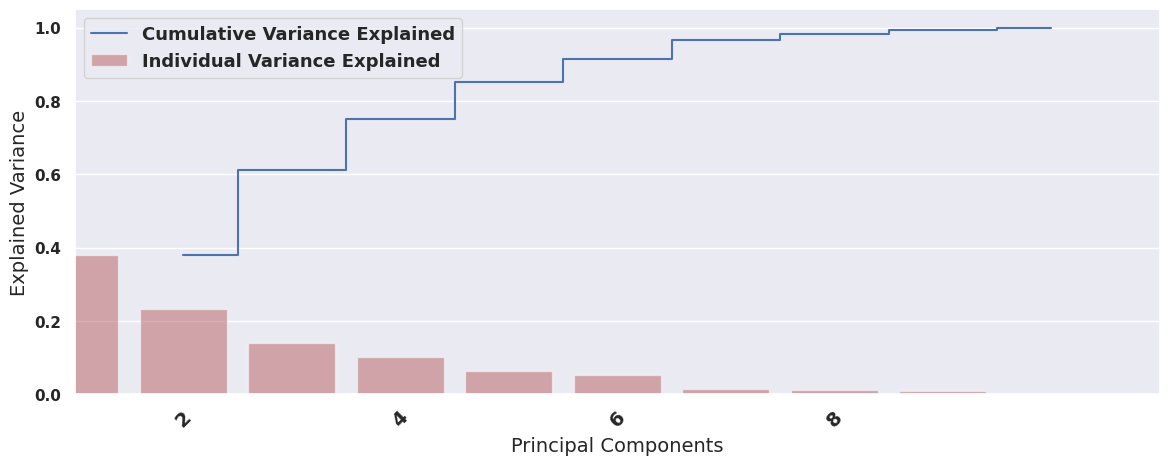

In [66]:
fig, ax = plt.subplots(figsize=(14, 5))

# Cumulative Variance Explained
plt.step(range(1, matrix.shape[1] + 1), pca.explained_variance_ratio_.cumsum(), where='mid', label='Cumulative Variance Explained')

# Individual Variance Explained
sns.barplot(x=np.arange(1, matrix.shape[1] + 1), y=pca.explained_variance_ratio_, alpha=0.5, color='r', label='Individual Variance Explained')

plt.xlim(0, 10)
plt.xticks(rotation=45, fontsize=14)

ax.set_xticklabels([s.get_text() if int(s.get_text()) % 2 == 0 else '' for s in ax.get_xticklabels()])

plt.ylabel("Explained Variance", fontsize=14)
plt.xlabel("Principal Components", fontsize=14)
plt.legend(loc='upper left', fontsize=13)
plt.show()

### Using clusters for Hyperparameter tuning

In [67]:
for n_clusters in range(3, 21):
    kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init = 30)
    kmeans.fit(scaled_matrix)
    clusters = kmeans.predict(scaled_matrix)
    sil_avg = silhouette_score(scaled_matrix, clusters)
    print("For n_clusters : ", n_clusters, "The average silhouette_score is : ", sil_avg)

For n_clusters :  3 The average silhouette_score is :  0.8217647490239215
For n_clusters :  4 The average silhouette_score is :  0.7853493558413782
For n_clusters :  5 The average silhouette_score is :  0.797461750228927
For n_clusters :  6 The average silhouette_score is :  0.7911122436247786
For n_clusters :  7 The average silhouette_score is :  0.7800613318221497
For n_clusters :  8 The average silhouette_score is :  0.590356528114132
For n_clusters :  9 The average silhouette_score is :  0.5931825984394133
For n_clusters :  10 The average silhouette_score is :  0.5214869813708449
For n_clusters :  11 The average silhouette_score is :  0.5387330604633488
For n_clusters :  12 The average silhouette_score is :  0.46498155160601945
For n_clusters :  13 The average silhouette_score is :  0.39715772326439025
For n_clusters :  14 The average silhouette_score is :  0.3150678479727625
For n_clusters :  15 The average silhouette_score is :  0.3245472984522602
For n_clusters :  16 The average

In [68]:
nclusters = 10
kmeans = KMeans(init = 'k-means++', n_clusters = nclusters, n_init = 100)
kmeans.fit(scaled_matrix)
clusters_clients = kmeans.predict(scaled_matrix)
silhouette_avg = silhouette_score(scaled_matrix, clusters_clients)
print("Silhouette Score : {:<.3f}".format(silhouette_avg))

Silhouette Score : 0.502


In [69]:
clusters_counts_df = pd.DataFrame(pd.Series(clusters_clients).value_counts())
clusters_counts_df.T

,5,0,6,7,9,8,2,3,1,4
count,3632,472,150,24,17,12,2,1,1,1


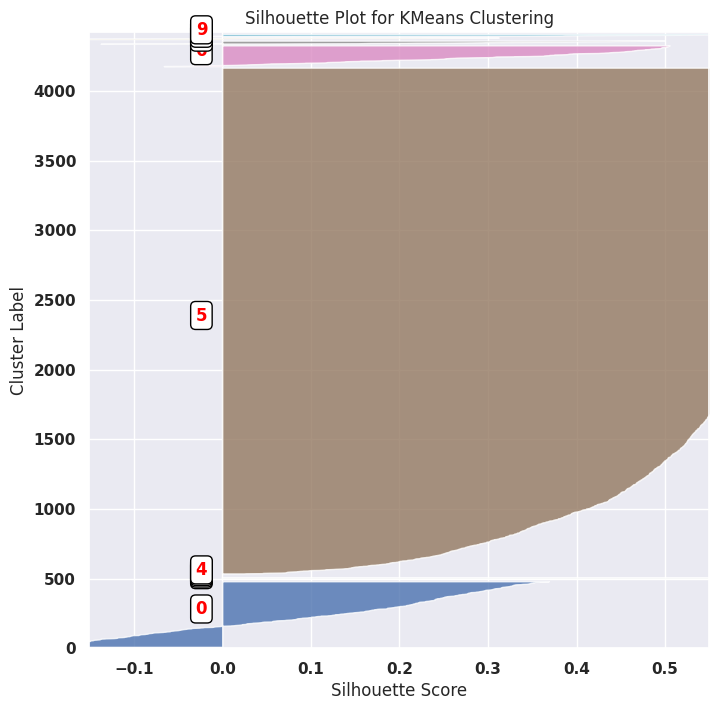

In [70]:
sample_silhouette_values = silhouette_samples(scaled_matrix, clusters_clients)

plt.figure(figsize=(8, 8))
plt.xlim(-0.15, 0.55)  # Adjusted limits according to your specified range
plt.ylim(0, len(scaled_matrix) + (nclusters + 1) * 10)
y_lower = 10

# Plot silhouette scores for each cluster
for i in range(nclusters):
    ith_cluster_silhouette_values = sample_silhouette_values[clusters_clients == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, alpha=0.8)

    plt.text(-0.03, y_lower + 0.5 * size_cluster_i, str(i),
             color='red', fontweight='bold',
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

    y_lower = y_upper + 10

plt.xlabel('Silhouette Score')
plt.ylabel('Cluster Label')
plt.title('Silhouette Plot for KMeans Clustering')
plt.show()

In [71]:
selected_customers.loc[:, 'cluster'] = clusters_clients

In [72]:
merged_df = pd.DataFrame()
for i in range(nclusters):
    test = pd.DataFrame(selected_customers[selected_customers['cluster'] == i].mean())
    test = test.T.set_index('cluster', drop = True)
    test['size'] = selected_customers[selected_customers['cluster'] == i].shape[0]
    merged_df = pd.concat([merged_df, test])

merged_df.drop('Customer ID', axis = 1, inplace = True)
print('Number of customers : ', merged_df['size'].sum())

Number of customers :  4312


In [73]:
liste_index = []
for i in range(5):
    column = 'categ_{}'.format(i)
    liste_index.append(merged_df[merged_df[column] > 45].index.values[0])

liste_index_reordered = liste_index
liste_index_reordered += [s for s in merged_df.index if s not in liste_index]

merged_df = merged_df.reindex(index = liste_index_reordered)
merged_df = merged_df.reset_index(drop = False)
merged_df

,cluster,count,min,max,mean,sum,categ_0,categ_1,categ_2,categ_3,categ_4,LastPurchase,FirstPurchase,size
0,1.0,2.000000,4.950000,15.000000,9.975000,19.950000,6198.997494,586.466165,4401.403509,1577.142857,499.248120,335.000000,339.000000,1
1,1.0,2.000000,4.950000,15.000000,9.975000,19.950000,6198.997494,586.466165,4401.403509,1577.142857,499.248120,335.000000,339.000000,1
2,1.0,2.000000,4.950000,15.000000,9.975000,19.950000,6198.997494,586.466165,4401.403509,1577.142857,499.248120,335.000000,339.000000,1
3,1.0,2.000000,4.950000,15.000000,9.975000,19.950000,6198.997494,586.466165,4401.403509,1577.142857,499.248120,335.000000,339.000000,1
4,1.0,2.000000,4.950000,15.000000,9.975000,19.950000,6198.997494,586.466165,4401.403509,1577.142857,499.248120,335.000000,339.000000,1
5,0.0,13.044492,78.427839,2754.409305,706.651680,7119.480540,26.901278,13.997800,10.288002,18.395907,8.264656,25.508475,325.125000,472
6,2.0,1.000000,18327.235000,18327.235000,18327.235000,18327.235000,0.154369,0.180166,0.337416,0.229525,0.048339,252.500000,252.500000,2
7,3.0,1.000000,6.750000,6.750000,6.750000,6.750000,14112.000000,11324.444444,940.740741,9054.814815,3419.570370,370.000000,370.000000,1
8,4.0,1.000000,0.950000,0.950000,0.950000,0.950000,0.000000,4036.842105,3726.315789,4026.315789,9732.631579,357.000000,357.000000,1
9,5.0,2.997797,203.724731,525.101604,339.234709,1030.175955,51.106435,26.008473,17.500451,37.959747,19.681817,103.009086,234.402808,3632


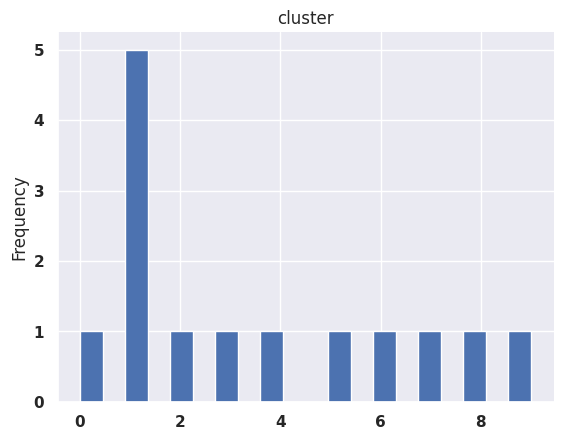

In [74]:
# @title cluster

from matplotlib import pyplot as plt
merged_df['cluster'].plot(kind='hist', bins=20, title='cluster')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [75]:
selected_customers.to_csv(path+"selected_customers.csv")


In [76]:
merged_df.to_csv(path+"merged_df.csv")

## Classifying the Customers :

In [77]:
selected_customers = pd.read_csv(path+'selected_customers.csv')
merged_df = pd.read_csv(path+'merged_df.csv')

In [93]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix


class ClassFit:
    def __init__(self, clf):
        self.clf = clf

    def train(self, x_train, y_train):
        self.clf.fit(x_train, y_train)

    def predict(self, x):
        return self.clf.predict(x)

    def set_grid_search(self, parameters, kfold):
        self.grid = GridSearchCV(estimator=self.clf, param_grid=parameters, cv=kfold)

    def fit_grid_search(self, X, Y):
        self.grid.fit(X, Y)

    def predict_grid_search(self, X):
        return self.grid.predict(X)

    def evaluate_grid_search(self, X, Y):
        predictions = self.grid.predict(X)
        accuracy = accuracy_score(Y, predictions)
        print(f"Accuracy: {accuracy * 100:.2f} %")
        print(classification_report(Y, predictions))

    def plot_confusion_matrix(self, Y_true, Y_pred, labels):
        cm = confusion_matrix(Y_true, Y_pred)
        plt.figure(figsize=(10, 7))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.title('Confusion Matrix')
        plt.show()

    def plot_learning_curve(self, X, Y):
        train_sizes, train_scores, test_scores = learning_curve(self.grid.best_estimator_, X, Y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5))
        train_scores_mean = np.mean(train_scores, axis=1)
        train_scores_std = np.std(train_scores, axis=1)
        test_scores_mean = np.mean(test_scores, axis=1)
        test_scores_std = np.std(test_scores, axis=1)

        plt.figure(figsize=(10, 7))
        plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='r')
        plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='g')
        plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
        plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
        plt.xlabel('Training examples')
        plt.ylabel('Score')
        plt.title('Learning Curve')
        plt.legend(loc='best')
        plt.show()


    @property
    def best_params_(self):
        return self.grid.best_params_

    @property
    def best_estimator_(self):
        return self.grid.best_estimator_


In [94]:
columns = ['mean', 'categ_0', 'categ_1', 'categ_2', 'categ_3', 'categ_4']
x = selected_customers[columns]
y = selected_customers['cluster']

In [95]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = 0.2)

In [96]:
from sklearn.ensemble import RandomForestClassifier


clf_rf = RandomForestClassifier(random_state=42)
param_grid_rf = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
classifier_rf = ClassFit(clf_rf)
classifier_rf.set_grid_search(param_grid_rf, kfold=5)
classifier_rf.fit_grid_search(X_train, Y_train)
classifier_rf.evaluate_grid_search(X_test, Y_test)
print("Best Parameters (RandomForest):", classifier_rf.best_params_)
print("Best Estimator (RandomForest):", classifier_rf.best_estimator_)


Accuracy: 87.95 %
              precision    recall  f1-score   support

           0       0.50      0.19      0.28        93
           5       0.91      0.99      0.95       727
           6       0.63      0.71      0.67        34
           7       0.00      0.00      0.00         6
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         2

    accuracy                           0.88       863
   macro avg       0.34      0.31      0.32       863
weighted avg       0.85      0.88      0.85       863

Best Parameters (RandomForest): {'max_depth': None, 'n_estimators': 50}
Best Estimator (RandomForest): RandomForestClassifier(n_estimators=50, random_state=42)


In [97]:
from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression(max_iter=200, random_state=42)
param_grid_lr = {'C': [0.1, 1, 10], 'solver': ['liblinear', 'lbfgs']}
classifier_lr = ClassFit(clf_lr)
classifier_lr.set_grid_search(param_grid_lr, kfold=5)
classifier_lr.fit_grid_search(X_train, Y_train)
classifier_lr.evaluate_grid_search(X_test, Y_test)
print("Best Parameters (LogisticRegression):", classifier_lr.best_params_)
print("Best Estimator (LogisticRegression):", classifier_lr.best_estimator_)


Accuracy: 87.02 %
              precision    recall  f1-score   support

           0       0.42      0.11      0.17        93
           5       0.89      0.99      0.94       727
           6       0.58      0.53      0.55        34
           7       0.00      0.00      0.00         6
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         2

    accuracy                           0.87       863
   macro avg       0.32      0.27      0.28       863
weighted avg       0.82      0.87      0.83       863

Best Parameters (LogisticRegression): {'C': 1, 'solver': 'liblinear'}
Best Estimator (LogisticRegression): LogisticRegression(C=1, max_iter=200, random_state=42, solver='liblinear')
